 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv_path = (r"C:\Users\tlsul\Desktop\bootcamp\Starter_Code (2)\Starter_Code\Resources\whale_returns.csv")


whale_df = pd.read_csv(whale_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\tlsul\AppData\Local\Temp\ipykernel_8420\2984070844.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [3]:
# Count nulls
number_of_nulls = whale_df.isnull().sum()
number_of_nulls

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
clean_whale_df = whale_df.dropna()
clean_whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algorithmic_returns_path = (r"C:\Users\tlsul\Desktop\bootcamp\Starter_Code (2)\Starter_Code\Resources\algo_returns.csv")


algorithmic_returns_path = pd.read_csv(algorithmic_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\tlsul\AppData\Local\Temp\ipykernel_8420\3454739766.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algorithmic_returns_path = pd.read_csv(algorithmic_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [6]:
# Count nulls
algo_returns_nulls = algorithmic_returns_path.isnull().sum()
algo_returns_nulls

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
clean_algo_returns = algorithmic_returns_path.dropna()
#clean_algo_returns.isnull().sum()
clean_algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices
sp_returns_path = (r"C:\Users\tlsul\Desktop\bootcamp\Starter_Code (2)\Starter_Code\Resources\sp500_history.csv")


sp_returns_path = pd.read_csv(sp_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\tlsul\AppData\Local\Temp\ipykernel_8420\1563023716.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp_returns_path = pd.read_csv(sp_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
C:\Users\tlsul\AppData\Local\Temp\ipykernel_8420\1563023716.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp_returns_path = pd.read_csv(sp_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [9]:
# Check Data Types
sp_returns_path.dtypes

Close    object
dtype: object

In [57]:
# Fix Data Types
#sp_returns_path["Close"]= sp_returns_path["Close"].str.strip('$')

sp_returns_path.columns = ["s&p close"]
sp_returns_path["s&p close"] = sp_returns_path["s&p close"].astype(float)
#sp_returns_path.head()

sp_returns_path.dtypes


 

s&p close    float64
dtype: object

In [58]:
# Calculate Daily Returns


s&p close    float64
dtype: object

In [61]:
# Rename `Close` Column to be specific to this portfolio.

sp_returns = sp_returns_path.pct_change()
sp_returns.head()

,s&p close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [63]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combinded_df = pd.concat([clean_algo_returns,clean_whale_df,sp_returns], axis = "columns", join = "inner")
combinded_df.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,s&p close
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

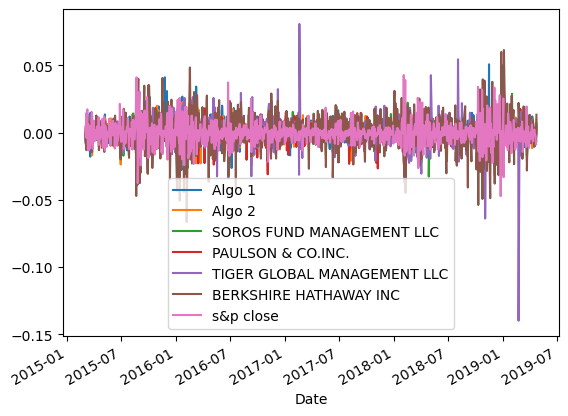

In [67]:
# Plot daily returns of all portfolios
ax =combinded_df.plot()

#### Calculate and Plot cumulative returns.

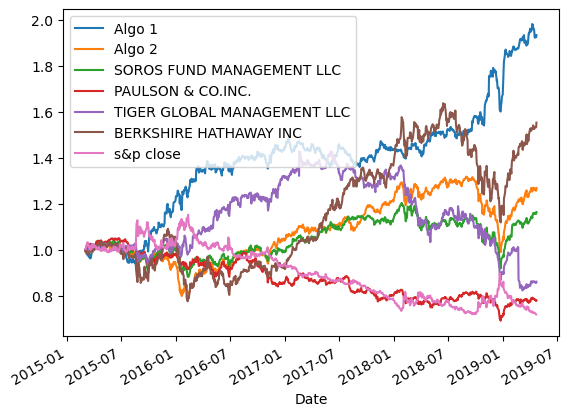

In [68]:
# Calculate cumulative returns of all portfolios
all_portfolios_cumlative = (1 + combinded_df).cumprod()
# Plot cumulative returns
ar = all_portfolios_cumlative.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

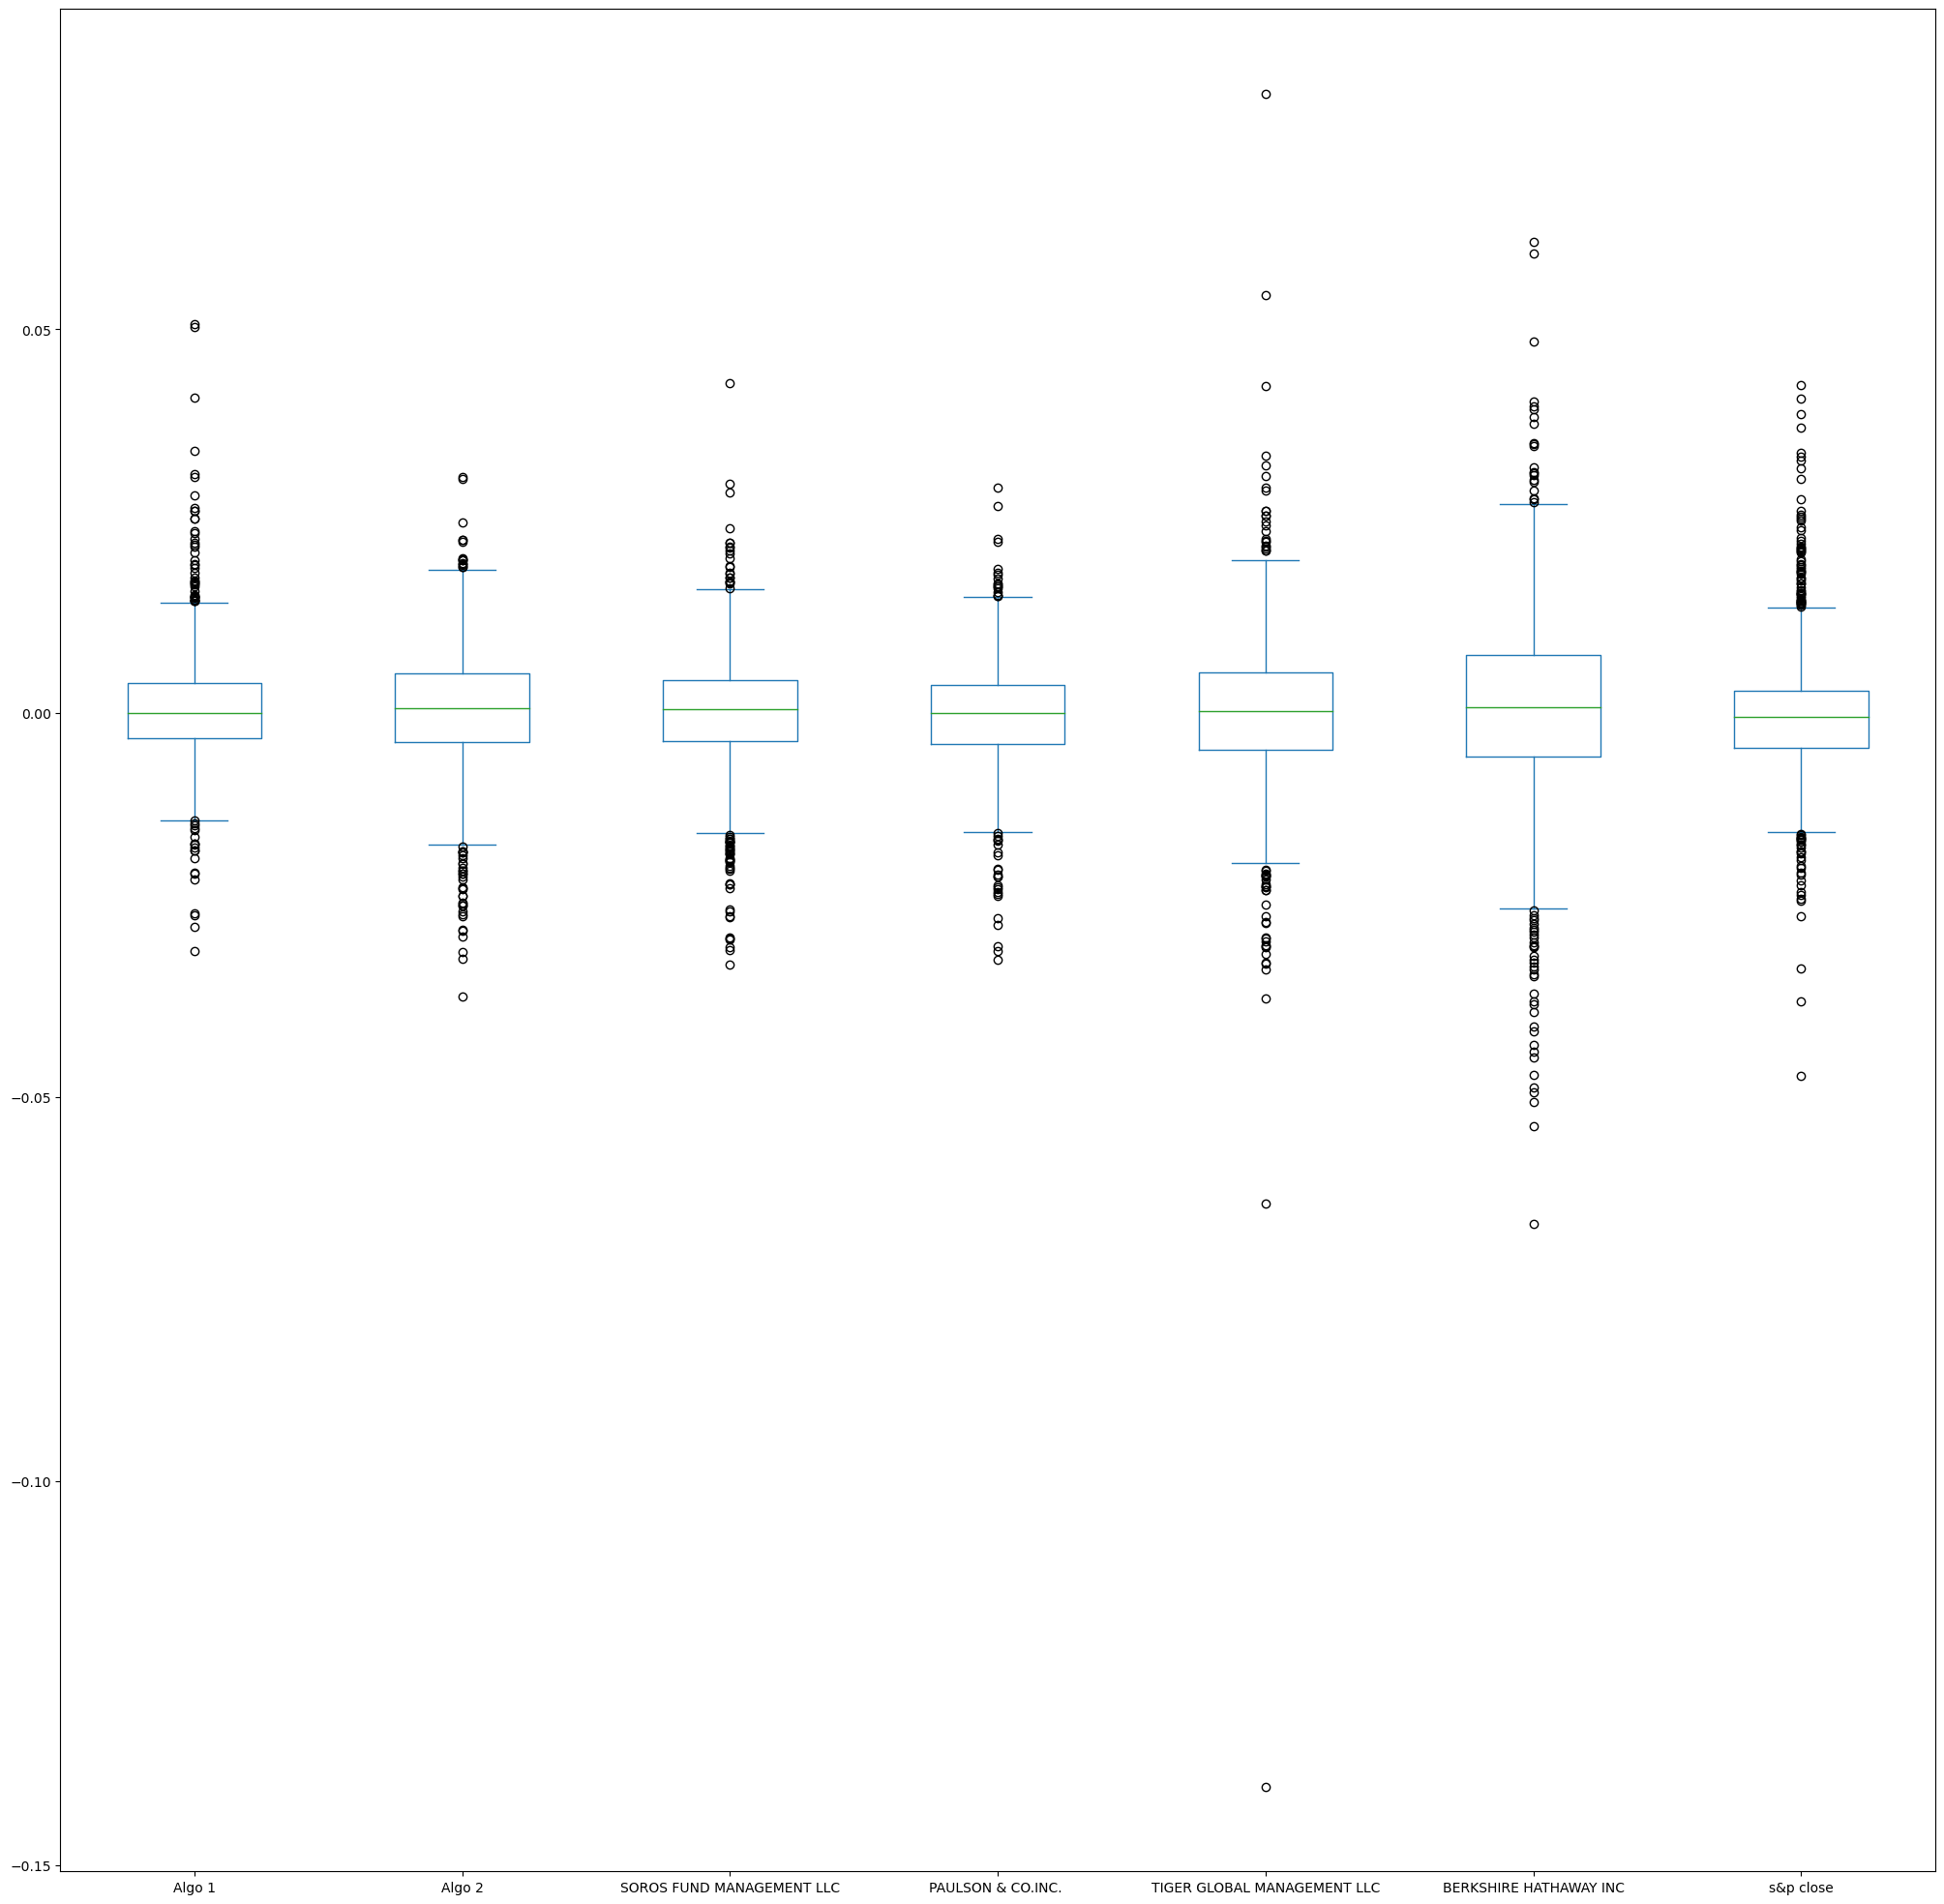

In [88]:
az = combinded_df
az.plot.box(figsize=(25,25))
  
        
    

### Calculate Standard Deviations

In [134]:
# Calculate the daily standard deviations of all portfolios
daily_std_portfolios = combinded_df.std()
daily_std_portfolios.columns = ['Portfolio', 'std']
daily_std_portfolios

Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
s&p close                      0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [179]:
# Calculate  the daily standard deviation of S&P 500
daily_std_portfolios.sort_values(ascending = False)
#print(type(daily_std_portfolios))
# Determine which portfolios are riskier than the S&P 500
sp_close = 0.008587

for label, risk in daily_std_portfolios.items():
     
    if risk > sp_close:
        
        print(label, risk)
    

TIGER GLOBAL MANAGEMENT LLC 0.010893969618743005
BERKSHIRE HATHAWAY INC 0.012918618441883491


### Calculate the Annualized Standard Deviation

In [181]:
# Calculate the annualized standard deviation (252 trading days)
portfolios_annualized_std = combinded_df.std() * np.sqrt(252)
portfolios_annualized_std

Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
s&p close                      0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

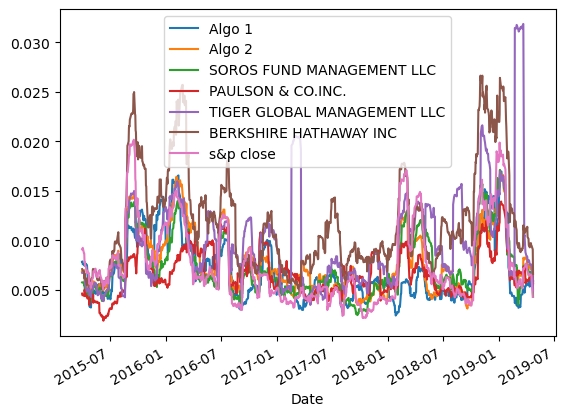

In [183]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_three_week_std = combinded_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_three_week_std.plot()

### Calculate and plot the correlation

In [185]:
# Calculate the correlation
correlation_combinded_df = combinded_df.corr()
# Display de correlation matrix
correlation_combinded_df

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,s&p close
Algo 1,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033,-0.033963
Algo 2,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082,-0.002192
SOROS FUND MANAGEMENT LLC,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360,0.000574
PAULSON & CO.INC.,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423,-0.001505
BERKSHIRE HATHAWAY INC,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000,-0.013856
s&p close,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

-0.0019097027512373125


<Axes: title={'center': 'Tiger Portfolio 30 day rolling Beta'}, xlabel='Date'>

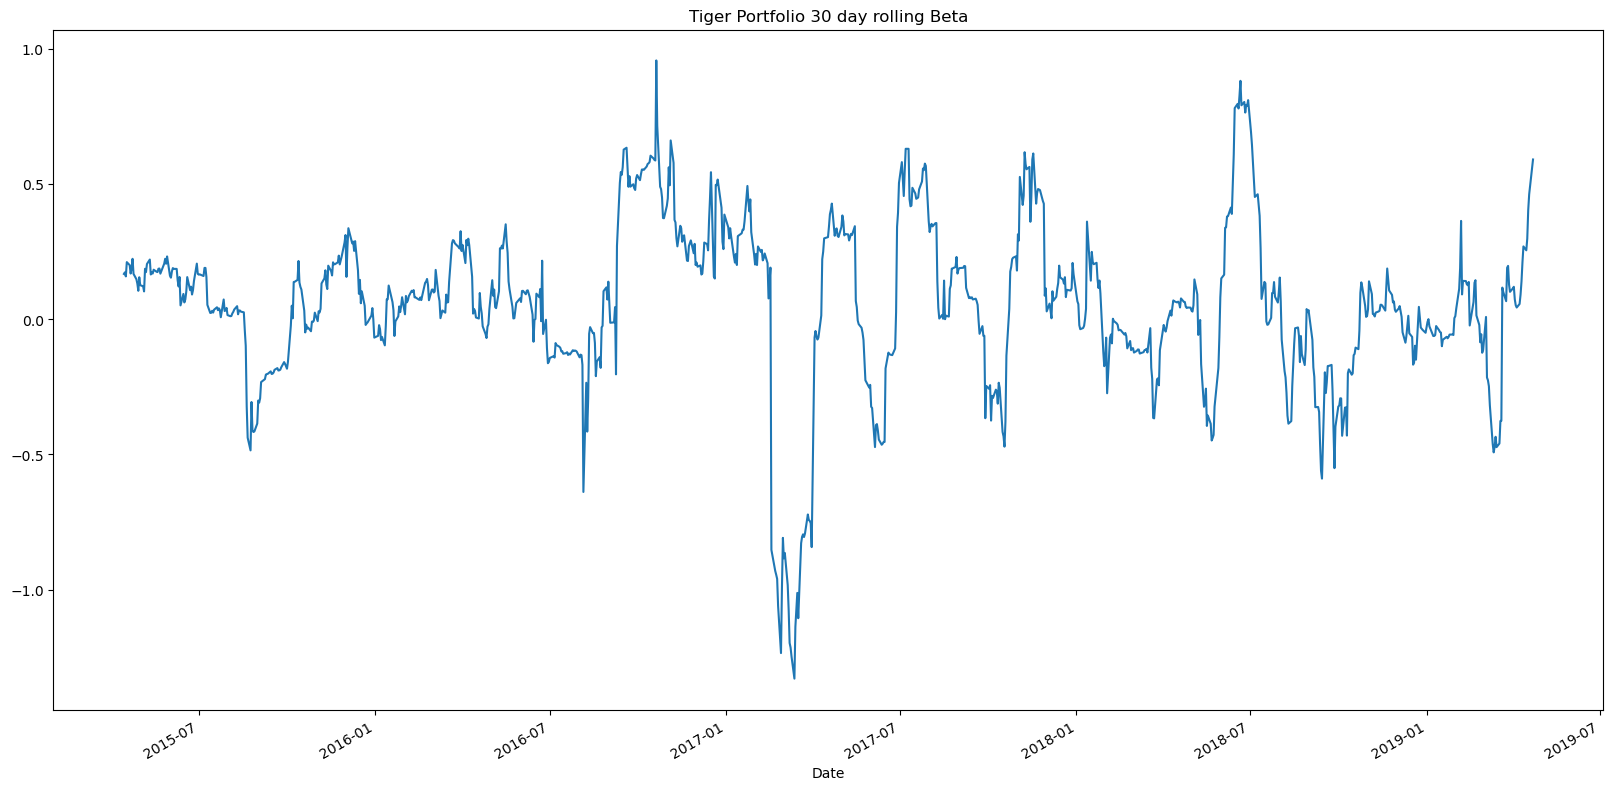

In [292]:
# Calculate covariance of a single portfolio
tiger_single_cov = combinded_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combinded_df['s&p close'])

# Calculate variance of S&P 500
sp_var = combinded_df['s&p close'].var()
# Computing beta
tiger_beta = tiger_single_cov/sp_var
print(tiger_beta)
# Plot beta trend
rolling_tiger_cov = combinded_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(combinded_df['s&p close'])
rolling_sp_var = combinded_df['s&p close'].rolling(window=30).var()
rolling_beta = rolling_tiger_cov/ rolling_sp_var
rolling_beta.plot(figsize=(20, 10), title='Tiger Portfolio 30 day rolling Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

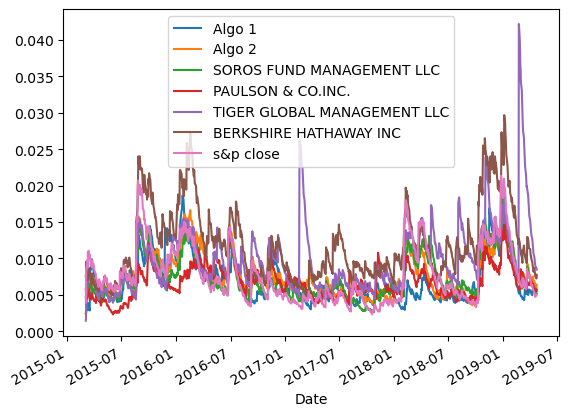

In [206]:
# Use `ewm` to calculate the rolling window
three_week_ewm_all_ports = combinded_df.ewm(span=21).std()
#print(three_week_ewm_all_ports)
three_week_ewm_all_ports.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [319]:
# Annualized Sharpe Ratios
annual_return = combinded_df.mean()*252
annual_risk = portfolios_annualized_std
rf = 0
sharpe_annual_all_ports = (annual_return-rf)/(annual_risk)


<Axes: >

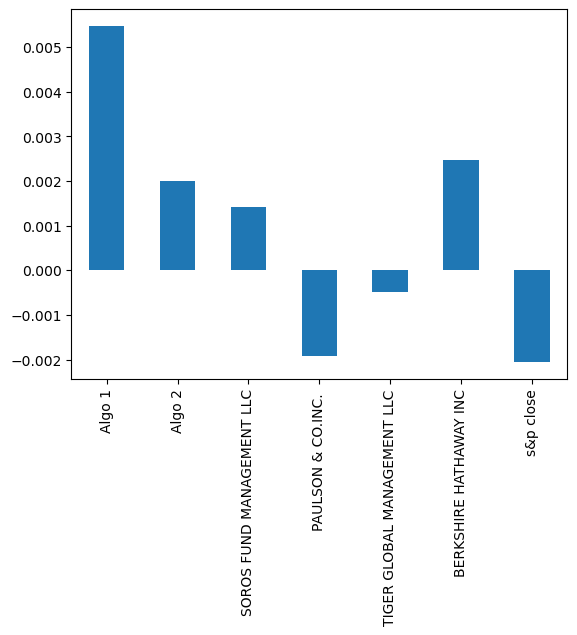

In [320]:
# Visualize the sharpe ratios as a bar plot
sharpe_annual_all_ports.plot(kind = 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

The two algo portfolios do in fat outperform the S&P 500 with respect to Sharpe ratio. Algo 2 does not outperform in regards to returns.  But Algo 1 does.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [272]:
# Reading data from 1st stock
custom_picks_file = (r"C:\Users\tlsul\Desktop\bootcamp\portfolio_custom.csv")
custom_picks = pd.read_csv(custom_picks_file, index_col="Date", infer_datetime_format=True, parse_dates=True
)


C:\Users\tlsul\AppData\Local\Temp\ipykernel_8420\2995285607.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  custom_picks = pd.read_csv(custom_picks_file, index_col="Date", infer_datetime_format=True, parse_dates=True


In [273]:
# Combine all stocks in a single DataFrame
custom_picks.head()

,TSLA,NVDA,XLE,MSFT,FNV
Date,,,,,
2015-03-02,108.10,143.15,84.40,239.58,138.15
2015-03-03,113.64,147.49,84.39,229.10,141.97
2015-03-04,110.34,142.65,85.93,222.31,139.85
2015-03-05,113.06,148.59,87.56,224.93,139.80
2015-03-06,119.77,156.28,87.25,227.12,142.10


In [274]:
# Calculate daily returns
custom_picks_returns = custom_picks.pct_change()
# Drop NAs
custom_picks_returns_clean = custom_picks_returns.dropna()
# Display sample data
custom_picks_returns_clean.head()

,TSLA,NVDA,XLE,MSFT,FNV
Date,,,,,
2015-03-03,0.051249,0.030318,-0.000118,-0.043743,0.027651
2015-03-04,-0.029039,-0.032816,0.018249,-0.029638,-0.014933
2015-03-05,0.024651,0.041640,0.018969,0.011785,-0.000358
2015-03-06,0.059349,0.051753,-0.003540,0.009736,0.016452
2015-03-09,-0.007681,0.017981,0.007106,0.007617,0.014075


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<Axes: xlabel='Date'>

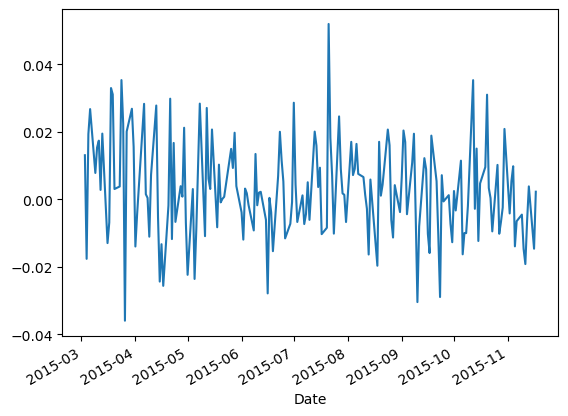

In [275]:
# Set weights
weights = [1/5, 1/5, 1/5,1/5,1/5]

# Calculate portfolio return
weighted_picks= custom_picks_returns_clean.dot(weights)
# Display sample data
weighted_picks.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [308]:
# Join your returns DataFrame to the original returns DataFrame
custom_and_combined_df = pd.concat([weighted_picks,combinded_df], axis=1)

In [309]:
custom_and_combined_df.columns = ['Picks', 'Algo 1', 'Algo 2','SOROS FUND MANAGEMENT LLC',	'PAULSON & CO.INC.',	'TIGER GLOBAL MANAGEMENT LLC',	'BERKSHIRE HATHAWAY INC',	's&p close']


In [322]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
clean_custom_and_combined_df = custom_and_combined_df.dropna()
clean_custom_and_combined_df.head()

,Picks,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,s&p close
Date,,,,,,,,
2015-03-03,0.013071,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.017635,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,0.019338,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,0.026750,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,0.007819,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [311]:
# Calculate the annualized `std`
clean_custom_and_combined_df_annual_std = clean_custom_and_combined_df.std()*np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

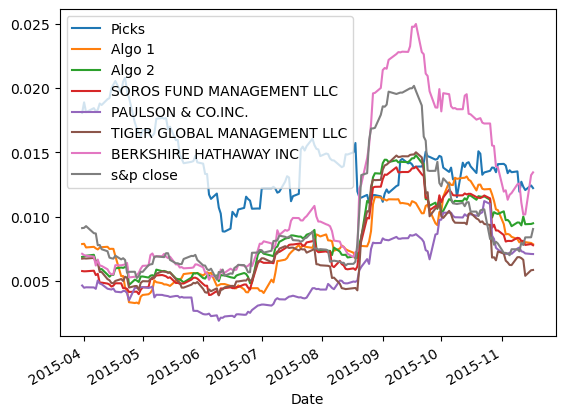

In [312]:
# Calculate rolling standard deviation annualized
rolling_custom_and_combined_std = clean_custom_and_combined_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_custom_and_combined_std.plot()

### Calculate and plot the correlation

In [313]:
# Calculate and plot the correlation
corr_clean_custom_combined = clean_custom_and_combined_df.corr()
corr_clean_custom_combined

,Picks,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,s&p close
Picks,1.000000,0.055267,-0.030967,-0.010297,-0.069547,-0.069630,-0.039824,0.026967
Algo 1,0.055267,1.000000,0.324448,0.457713,0.346029,0.311873,0.409316,-0.083422
Algo 2,-0.030967,0.324448,1.000000,0.861232,0.700725,0.827025,0.703364,-0.075841
SOROS FUND MANAGEMENT LLC,-0.010297,0.457713,0.861232,1.000000,0.801298,0.857534,0.777065,-0.126849
PAULSON & CO.INC.,-0.069547,0.346029,0.700725,0.801298,1.000000,0.716965,0.670920,-0.151979
TIGER GLOBAL MANAGEMENT LLC,-0.069630,0.311873,0.827025,0.857534,0.716965,1.000000,0.713655,-0.068381
BERKSHIRE HATHAWAY INC,-0.039824,0.409316,0.703364,0.777065,0.670920,0.713655,1.000000,-0.190857
s&p close,0.026967,-0.083422,-0.075841,-0.126849,-0.151979,-0.068381,-0.190857,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

0.05307112426034095


<Axes: title={'center': 'Custom Picks Portfolio 60 day rolling Beta'}, xlabel='Date'>

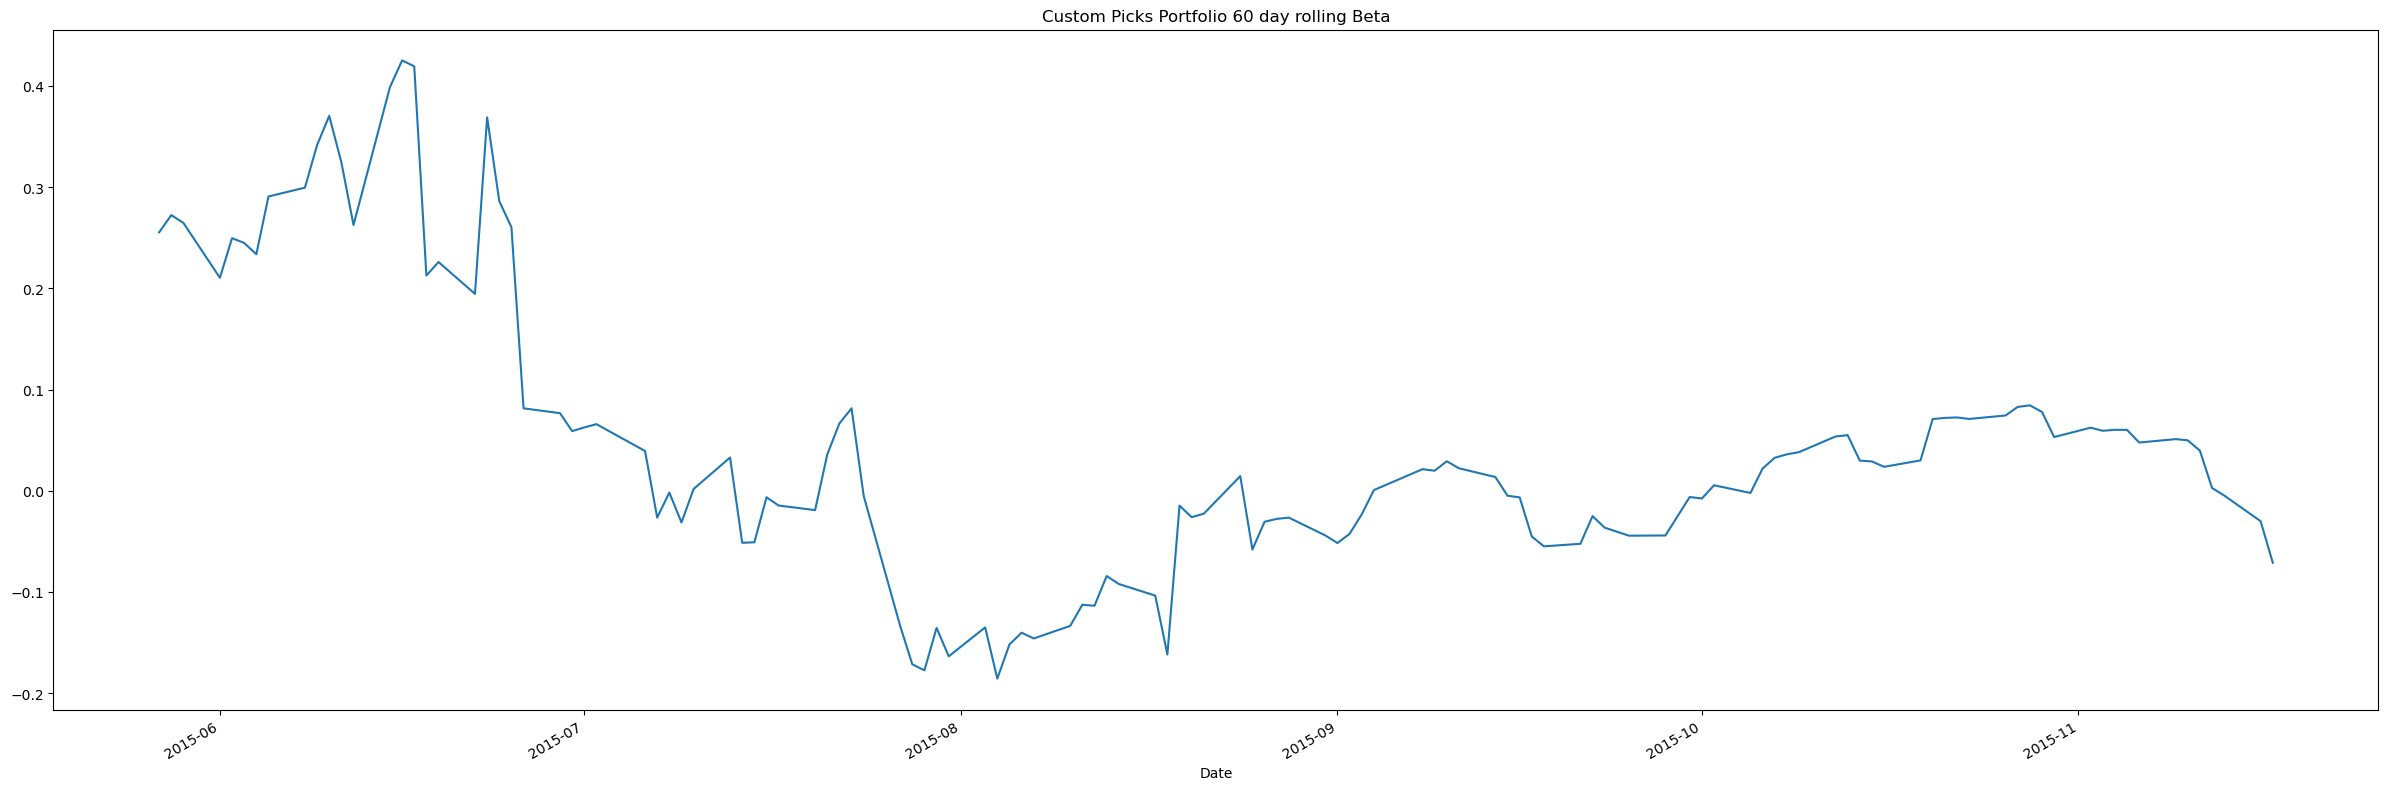

In [323]:
# Calculate and plot Beta
custom_and_combined_df_cov = clean_custom_and_combined_df['Picks'].cov(clean_custom_and_combined_df['s&p close'])
picks_beta = custom_and_combined_df_cov/sp_var
print(picks_beta)


# Plot beta trend
rolling_picks_cov = clean_custom_and_combined_df['Picks'].rolling(window=60).cov(clean_custom_and_combined_df['s&p close'])
rolling_sp_var = clean_custom_and_combined_df['s&p close'].rolling(window=60).var()
rolling_picks_beta = rolling_picks_cov/ rolling_sp_var
rolling_picks_beta.plot(figsize=(30, 10), title='Custom Picks Portfolio 60 day rolling Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [326]:
# Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratios
annual_return_with_picks = clean_custom_and_combined_df.mean()*252
annual_risk_with_picks = clean_custom_and_combined_df.std() * np.sqrt(252)
rf = 0
combined_with_custom_annual = (annual_return_with_picks-rf)/(annual_risk_with_picks)


combined_with_custom_annual = combined_with_custom_annual.dropna()
combined_with_custom_annual

Picks                          2.944370
Algo 1                         1.104123
Algo 2                        -0.455453
SOROS FUND MANAGEMENT LLC      0.053671
PAULSON & CO.INC.             -0.471348
TIGER GLOBAL MANAGEMENT LLC    0.218133
BERKSHIRE HATHAWAY INC         0.165467
s&p close                      0.179523
dtype: float64

<Axes: >

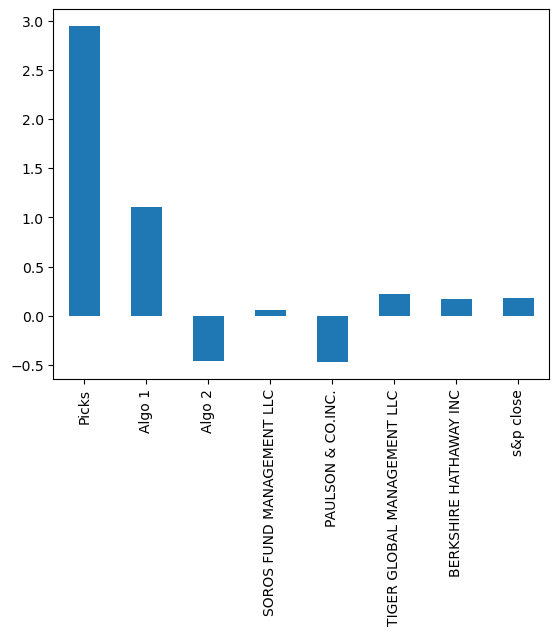

In [327]:
# Visualize the sharpe ratios as a bar plot
combined_with_custom_annual.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here!

My picks were the best, my portfolio had a sharp of 3, while the next highest was Algo 1.
